In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(ride_data_df, city_data_df, on='city')
combined_df2 = combined_df.drop_duplicates(subset='city', keep="first").reset_index(drop=True)

# Display the data table for preview

combined_df2.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

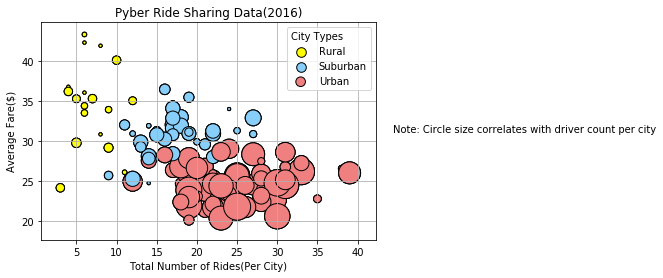

<Figure size 432x288 with 0 Axes>

In [10]:
# Obtain the x and y coordinates for each of the three city types

grouped_df = combined_df.groupby("city")
count_df = grouped_df.count()
count_df = count_df[["ride_id"]]
avg_df = grouped_df.mean()
avg_df = avg_df[["fare"]]

type_df = combined_df2.set_index("city")
type_df2 = type_df[["type"]]
type_df3 = type_df[["driver_count"]]

combined_1 = pd.merge(count_df, avg_df, on="city")
combined_2 = pd.merge(combined_1, type_df2, on="city")
combined_3 = pd.merge(combined_2, type_df3, on="city")

x = combined_3['ride_id']
y = combined_3['fare']
s = combined_3['driver_count']
label = combined_2['type']

col=[]


for l in label:
    if l=='Urban':
        col.append('lightcoral')
    elif l=='Suburban':
        col.append('lightskyblue')
    elif l=='Rural':
        col.append('yellow')

plt.scatter(x,y,s=s*10,c='yellow',facecolors="red", edgecolors="black", linewidths =1, label='Rural')
plt.scatter(x,y,s=s*10,c='lightskyblue',facecolors="red", edgecolors="black", linewidths =1, label='Suburban') 
plt.scatter(x,y,s=s*10,c=col,facecolors="red", edgecolors="black", linewidths =1, label='Urban')
 


# Incorporate the other graph properties,

plt.grid(True)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend

leg = plt.legend(title="City Types", loc='best',markerscale=0.5)
leg._legend_box.align = "left"


# Incorporate a text label regarding circle size

txt="Note: Circle size correlates with driver count per city"
plt.text(1.55, 0.5, txt, fontsize=10, ha='right', transform=plt.gcf().transFigure)
plt.show()

# Save Figure

plt.savefig("../Pyber/Ridesharing.png")

## Total Fares by City Type

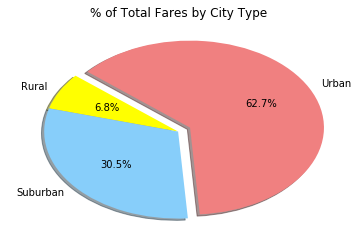

<Figure size 432x288 with 0 Axes>

In [166]:
# Calculate Type Percents

tf_df = combined_df.groupby("type")
tf_df = tf_df.sum()
tf_df = tf_df[['fare']]
tf_df['percent'] = tf_df['fare']/tf_df['fare'].sum()

# Build Pie Chart

pies = ["Rural","Suburban","Urban"]
pie_votes = tf_df['percent']
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure

plt.savefig("../Pyber/TotalFares.png")

## Total Rides by City Type

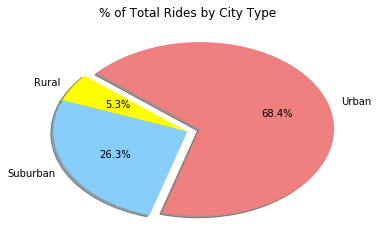

<Figure size 432x288 with 0 Axes>

In [160]:
# Calculate Ride Percents

tf_df2 = combined_df.groupby("type")
tf_df2 = tf_df2.count()
tf_df2 = tf_df2[['ride_id']]
tf_df2['percent'] = tf_df2['ride_id']/tf_df2['ride_id'].sum()


# Build Pie Chart

pies = ["Rural","Suburban","Urban"]
pie_votes = tf_df2['percent']
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure

plt.savefig("../Pyber/TotalRides.png")

## Total Drivers by City Type

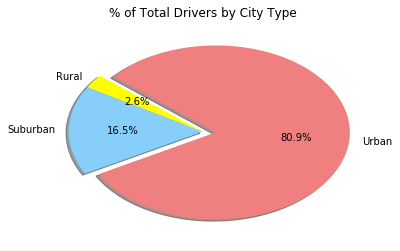

<Figure size 432x288 with 0 Axes>

In [256]:
# Calculate Driver Percents

tf_df3 = combined_df2.groupby("type")
tf_df3 = tf_df3.sum()
tf_df3 = tf_df3[['driver_count']]
tf_df3['percent'] = tf_df3['driver_count']/tf_df3['driver_count'].sum()

# Build Pie Charts
pies = ["Rural","Suburban","Urban"]
pie_votes = tf_df3['percent']
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0,0,0.1)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure

plt.savefig("../Pyber/TotalDrivers.png")

### Pyber Analysis

1. Urban has the majority shares for the result. It has most fares, rides, and drivers. Each share shows more than 60% which is pretty significant, so we can conclude that most pyber users are from urban area. 

2. More than 80% of drivers are from urban whereas 68% of rides happened in urban. This can be inferred that most drivers who opertates pyber are from Urban area even for some rides that happened in suburban and rural.

3. Average fare for rides in rural area is relatively higher than for ones in urban area. Based on this trend, we can assume that people who use pyber for rural area are more likey to use for long distance trip. 